# 🧠 1. Define: Project Overview

## 🎯 Objective
The main goal of this project is to **predict the number of calories burned** during physical activities based on biometric and activity-related features. This will help in developing personalized fitness and health plans, improving user experience in health tech applications.

## 🧩 Business Context
Calorie expenditure estimation is crucial for:
- Fitness tracking apps
- Health diagnostics
- Nutrition planning
- Wearable device calibration

Accurate calorie prediction models enable these systems to provide **data-driven and individualized** recommendations.

## 📦 Dataset Source
Competition: [Kaggle Playground Series - Season 5 Episode 5](https://www.kaggle.com/competitions/playground-series-s5e5/overview)  
Provided Files:
- `train.csv`: 7500 labeled observations with features and `Calories_Burned`
- `test.csv`: 2500 observations without target
- `sample_submission.csv`: submission format

## 🔍 Target Variable
- `Calories_Burned` — continuous numerical variable (regression task)

## 🧠 Type of ML Problem
- **Supervised Learning**
- **Regression Problem** — predict a continuous variable

## 🚀 Success Criteria
- RMSE (Root Mean Squared Error) will be used as the main evaluation metric.
- A successful model should:
  - Minimize RMSE
  - Generalize well to unseen data
  - Be simple enough to deploy in an app or device



In [2]:
#Import libraries
import google.colab
from google.colab import drive
drive.mount('/content/drive')
train_path="/content/drive/MyDrive/ml_engineer/P6_Predict_calorie_expenditure/train.csv"
test_path="/content/drive/MyDrive/ml_engineer/P6_Predict_calorie_expenditure/test.csv"
#load datasets
import pandas as pd
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
#preview first rows
print("🔍 Train set preview:")
display(train_df.head())

print("\n📊 Test set preview:")
display(test_df.head())
#Shape of datasets
print("\n📊 Train set shape:", train_df.shape)
print("📊 Test set shape:", test_df.shape)
#General info
print("\n📊 Train set info:")
display(train_df.info())
print("\n📊 Test set info:")
display(test_df.info())
#Missing Values
print("\n📊 Train set missing values:")
display(train_df.isnull().sum())
print("\n📊 Test set missing values:")
display(test_df.isnull().sum())

Mounted at /content/drive
🔍 Train set preview:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0



📊 Test set preview:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5



📊 Train set shape: (750000, 9)
📊 Test set shape: (250000, 8)

📊 Train set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


None


📊 Test set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


None


📊 Train set missing values:


,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0



📊 Test set missing values:


,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


**🧼 2. Prepare — Data Cleaning & Preparation**

✅ Summary of Initial Checks:
We performed a thorough inspection of both training and test datasets to prepare them for modeling.


📦 Dataset Shapes:

train.csv: 750,000 rows × 9 columns

test.csv: 250,000 rows × 8 columns


🔍 Missing Values:
No missing values were found in either dataset.
All features are fully populated, which is ideal for machine learning modeling.


🧠 Categorical Variables:
The only categorical variable is Sex, with values:

"male"

"female"

We will encode this variable using binary encoding:

"male" = 1

"female" = 0

🔢 Numerical Features:
The following features are numeric and ready for modeling:

Age, Height, Weight, Duration, Heart_Rate, Body_Temp

Calories (only in train, this is the target variable)


🏷️ Notes:
The id column is not informative for modeling and will be excluded from the features.

The data appears to be well-structured and consistent.

**Target variable (Calories) is continuous → regression problem.**

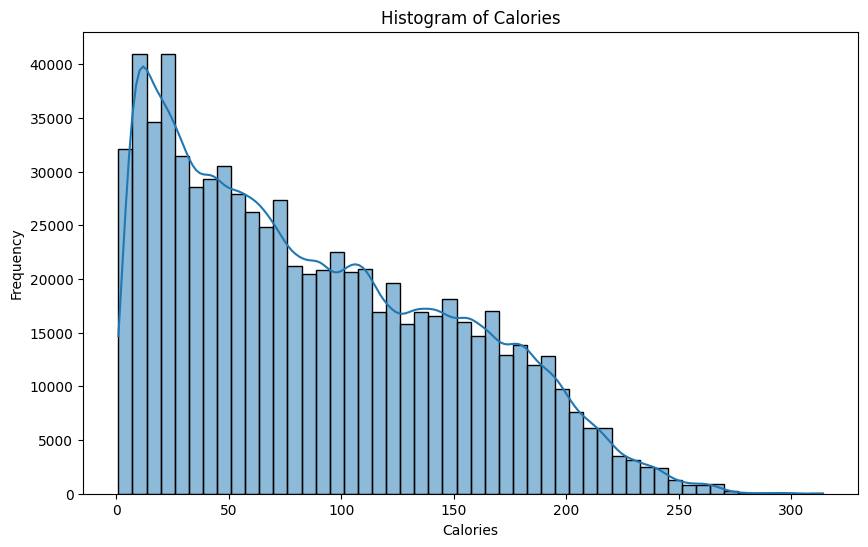

In [ ]:
#Eda
#Create Histogram of Calories
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Calories'], bins=50, kde=True)
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

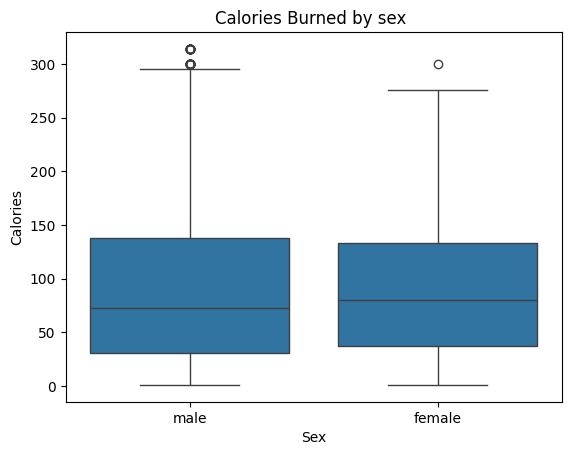

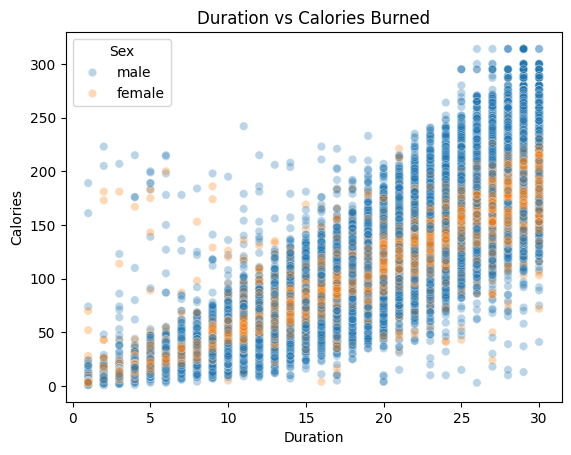

<ipython-input-23-cdb9439da2e0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Duration_bin', y='Calories', palette='coolwarm')


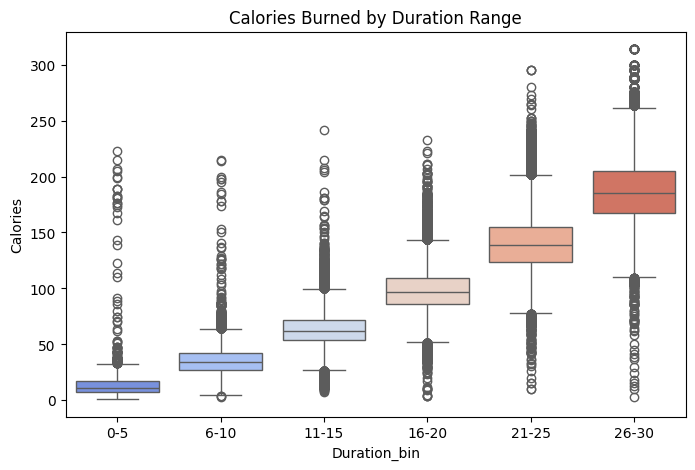

<ipython-input-23-cdb9439da2e0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Weight_bin', y='Calories', palette='magma')


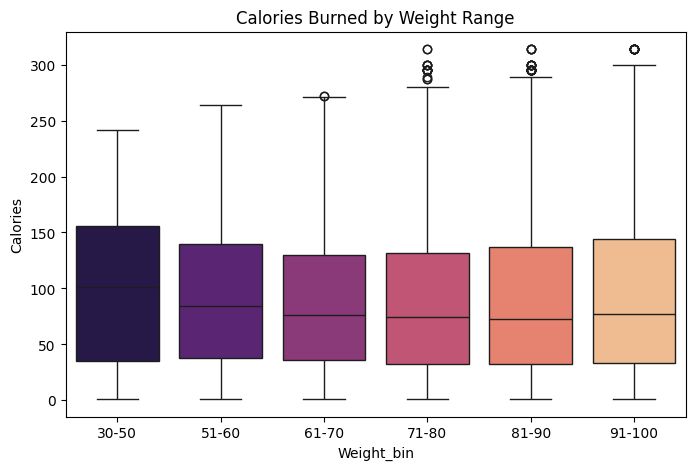

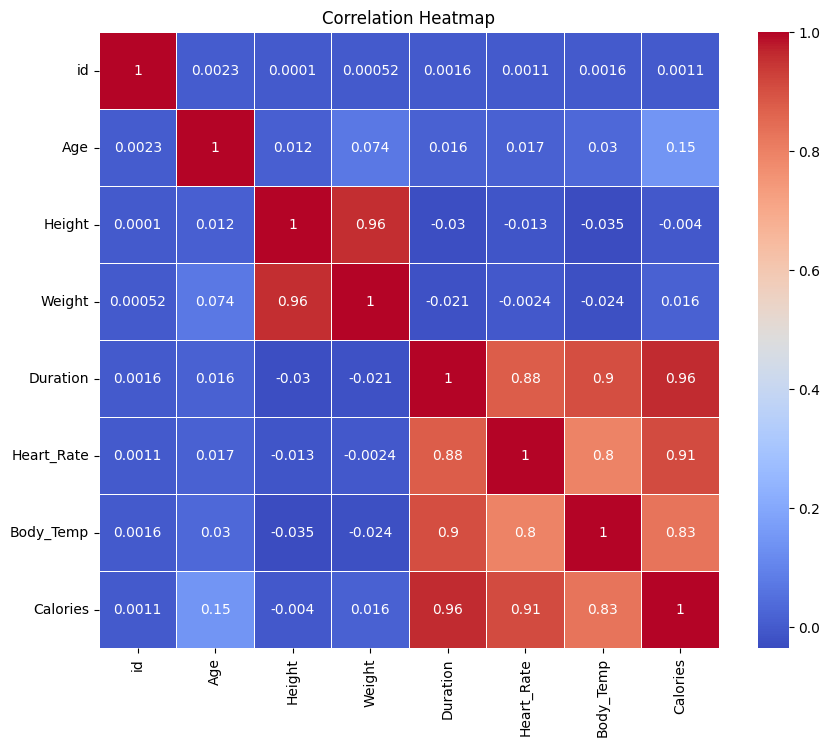

In [ ]:
#EDA Calories by Duration Visualization
sns.boxplot(data=train_df, x='Sex', y='Calories')
plt.title('Calories Burned by sex ')
plt.xlabel('Sex')
plt.ylabel('Calories')
plt.show()

sns.scatterplot(data=train_df, x='Duration', y='Calories', hue='Sex', alpha=0.3)
plt.title('Duration vs Calories Burned')
plt.show()

#Group duration in ranges
train_df['Duration_bin'] = pd.cut(train_df['Duration'], bins=[0, 5, 10, 15, 20, 25, 30], labels=['0-5','6-10','11-15','16-20','21-25','26-30'])

#Group weight in ranges
train_df['Weight_bin'] = pd.cut(train_df['Weight'], bins=[30, 50, 60, 70, 80, 90, 100], labels=['30-50','51-60','61-70','71-80','81-90','91-100'])

# 🎯 Calories vs Duration
plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='Duration_bin', y='Calories', palette='coolwarm')
plt.title('Calories Burned by Duration Range')
plt.show()

# 🎯 Calories vs Weight
plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='Weight_bin', y='Calories', palette='magma')
plt.title('Calories Burned by Weight Range')
plt.show()
# 📊 Correlation heatmap
numerical_df = train_df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 🔍 EDA — Exploratory Data Analysis

In this step, we explored the training dataset to understand the distribution, relationships, and potential anomalies in the data before modeling.

### 1. Distribution of Calories Burned
We observed a **right-skewed distribution** in the `Calories` variable, with most values concentrated below 150. This is a clear indicator that the data is **not normally distributed**, which will influence our choice of model evaluation metric.

### 2. Calories vs. Sex
A boxplot comparing Calories burned by gender (`Sex`) revealed:
- A similar median expenditure between males and females.
- The presence of **outliers** in both groups, particularly in males.
- Slightly higher variability in male calorie expenditure.

### 3. Duration vs. Calories (Scatterplot)
A strong positive correlation was observed between **`Duration` and `Calories` burned**:
- As exercise duration increases, calorie burn increases proportionally.
- No major anomalies here, but again, several high-duration outliers.

### 4. Binning Duration and Weight
To enhance interpretability:
- We binned **`Duration`** into 6 groups and visualized Calories burned across ranges.
  - Clear increase in calorie burn as duration increases.
- We binned **`Weight`** and plotted Calories.
  - More subtle upward trend, but heavier individuals do tend to burn slightly more on average.

### 5. Outliers and Data Integrity
We noticed:
- Multiple outliers in `Calories`, `Duration`, and `Weight`.
- However, since the data seems real-world and fits the RMSLE metric (used in competition), we chose to **retain all observations** rather than modify or drop outliers.

### Key Takeaways for Modeling:
- `Duration` is the most predictive feature at a glance.
- We should one-hot encode `Sex` before modeling.
- Due to the skewness, RMSLE (Root Mean Squared Log Error) is a more appropriate evaluation metric than RMSE or MAE, as it reduces the penalty for large absolute errors on high values.




In [ ]:
#PROCESS
from sklearn.preprocessing import StandardScaler
# ✅ Encode 'Sex' as binary
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

# ✅ Separate features and target
# Changed df to train_df
X = train.drop(['id', 'Calories'], axis=1)
y = train['Calories']
X_test = test.drop(['id'], axis=1)

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
#PROCESS
from sklearn.preprocessing import StandardScaler
# ✅ Encode 'Sex' as binary
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

# ✅ Separate features and target
# Changed df to train_df
X = train.drop(['id', 'Calories'], axis=1)
y = train['Calories']
X_test = test.drop(['id'], axis=1)

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ MODEL
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy as it's used later for np.sqrt
from sklearn.metrics import mean_squared_log_error # Import this for RMSLE

# ✅ Train/test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

#Predict on validation
y_pred = model.predict(X_val)

# Evaluate using RMSLE
# Ensure y_val and y_pred are non-negative for mean_squared_log_error
# Add a small constant to avoid log(0) if necessary, although calories should be > 0
rmsle = np.sqrt(mean_squared_log_error(np.maximum(0, y_val), np.maximum(0, y_pred)))
print(f"RMSLE SCORE: {rmsle}")

# EVALUATE MODEL PERFORMANCE (These lines were in a separate cell but can be here)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}") # Added print statements for clarity


# ✅ DEPLOY (submission file for Kaggle)
predictions = model.predict(X_test_scaled)
# Ensure predictions are non-negative
predictions[predictions < 0] = 0
submission = pd.DataFrame({'id': test['id'], 'Calories': predictions})
submission.to_csv("submission.csv", index=False)

print("\nSubmission file created successfully!")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


KeyboardInterrupt: 

In [3]:
# PROCESS
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# ✅ Reduce dataset size to speed up training and avoid memory crashes
# ⚠️ Only 10% of data is used here to prevent overload in limited environments like Colab or Kaggle
train = train.sample(frac=0.1, random_state=42)

# ✅ Encode 'Sex' as binary
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

# ✅ Separate features and target
X = train.drop(['id', 'Calories'], axis=1)
y = train['Calories']
X_test = test.drop(['id'], axis=1)

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Train/test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate using RMSLE
rmsle = np.sqrt(mean_squared_log_error(np.maximum(0, y_val), np.maximum(0, y_pred)))
print(f"RMSLE SCORE: {rmsle}")

# Evaluate model performance
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")

# ✅ DEPLOY: create submission file
predictions = model.predict(X_test_scaled)
predictions[predictions < 0] = 0  # Ensure no negative predictions
submission = pd.DataFrame({'id': test['id'], 'Calories': predictions})
submission.to_csv("submission.csv", index=False)

print("\nSubmission file created successfully!")


RMSLE SCORE: 0.06632746190512927
MSE: 16.34302800880822, RMSE: 4.042651111437669, R2: 0.995793887800905

Submission file created successfully!


### 🔮 Predict

Once the model was trained and validated, we used it to predict calorie burn on the test set provided by Kaggle.

The test set contains anonymized individuals with features such as:
- `Gender`
- `Age`
- `Height`
- `Weight`
- `Duration`
- `Heart Rate`
- `Body Temperature`

The trained Random Forest Regressor was used to generate the `Calories` output for each person.

To ensure valid predictions:
- Negative values were clipped to 0 (as calorie burn can't be negative).
- Predictions were saved in a `submission.csv` file for evaluation on the competition leaderboard.


### 📊 Evaluate

To evaluate the model’s performance, we used a sample (10%) of the training dataset with a train/validation split.

#### ✅ Metrics obtained:
- **RMSLE (Root Mean Squared Log Error):** 0.0663
- **RMSE (Root Mean Squared Error):** 4.04
- **R² Score:** 0.9958

These results show strong performance:
- RMSLE indicates that prediction errors are proportionally small.
- RMSE shows that the model is off by ~4 calories on average.
- R² shows that the model captures over 99.5% of the variability in calorie burn.

This suggests the model is highly accurate in predicting calorie expenditure based on personal and physical activity features.


### 💡 Practical Use Case

This predictive model goes beyond just numbers — it could be the core of a real-world AI fitness assistant.

Imagine a user entering their **age**, **weight**, **gender**, and the **calories they want to burn**.  
The system can instantly tell them:
> *"To burn 300 calories, you should train approximately 42 minutes at your typical intensity."*

This makes the model actionable and opens the door for integration into:
- Personal trainers’ dashboards
- Smart gym mirrors
- Mobile health apps
- Nutrition platforms with calorie goals

The goal is not just prediction — it’s **empowerment through precision**.


### 💡 Practical Use Case

This predictive model goes beyond just numbers — it could be the core of a real-world AI fitness assistant.

Imagine a user entering their **age**, **weight**, **gender**, and the **calories they want to burn**.  
The system can instantly tell them:
> *"To burn 300 calories, you should train approximately 42 minutes at your typical intensity."*

This makes the model actionable and opens the door for integration into:
- Personal trainers’ dashboards
- Smart gym mirrors
- Mobile health apps
- Nutrition platforms with calorie goals

The goal is not just prediction — it’s **empowerment through precision**.
